In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt


In [3]:
# Generate synthetic mixed signals
np.random.seed(42)
samples = 200
time = np.linspace(0, 8, samples)

signal_1 = np.sin(2 * time) 
signal_2 = np.sign(np.sin(3 * time)) 
signal_3 = np.random.laplace(size= samples) 

S = np.c_[signal_1, signal_2, signal_3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise

# Mix the signals
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]]) # Mixing matrix
X = S.dot(A.T) # Observed mixed signals


In [4]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) # Estimated sources


/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


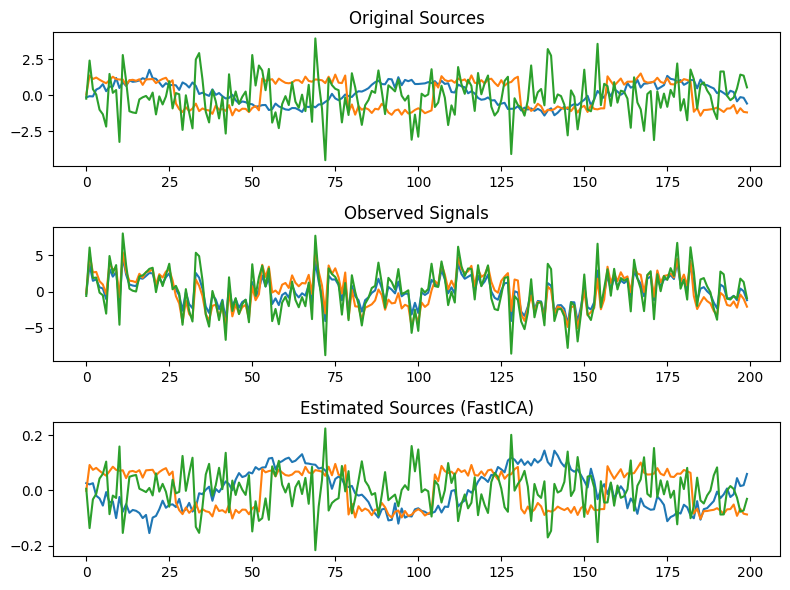

In [5]:
# Plot the results
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.title('Original Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Observed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Estimated Sources (FastICA)')
plt.plot(S_)

plt.tight_layout()
plt.show()
